# Toy LAR Model: Numerical experiments

Equations:

$$
\frac{\mathrm{d}\mathrm{L}}{\mathrm{d}t}=P-E-Q
$$

$$
\frac{\mathrm{d}\mathrm{A}}{\mathrm{d}t}=-P+E+(-\vec \nabla\cdot \vec q)
$$

where:

- $L$ is the volume of water in land.

- $A$ is the volume of water in the atmosphere.

- $P(A,\{v_{Pi}(t)\})$ is the precipitation rate and $\{v_{Pi}\}$ are the *precipitation valve parameters*.

- $E(L,A,\{v_{Ei}(t)\})$ is the evotranspiration rate and $\{v_{Ei}\}$ are the *evapotranspiration valve parameters*.

- $Q(L,\{v_{Qi}(t)\})$ is the rate at which water leave the system and $\{v_{Ei}\}$ are the *output valve parameters*.

- $(-\vec \nabla\cdot \vec q)$ is abreviated as *nabla-q* and is the rate at which water enters into the atmosphere.

# Initialization

## Package download 

In [8]:
!git clone http://github.com/seap-udea/pylar

fatal: destination path 'pylar' already exists and is not an empty directory.


### Useful snippets

#### Basic code

In [9]:
"""
#Valves functions
nqfun=lambda t,L,A:1+0.3*np.sin(t)
Pfun=lambda t,L,A:0.01*A
Efun=lambda t,L,A:0.01*L
Qfun=lambda t,L,A:0.01*L
vfuns=nqfun,Pfun,Efun,Qfun

#Solution
ts,Ls,As,nqs,Qs,Ps,Es=solveLAR([0,0],0,20,100,vfuns,h=0.1)

plotSolution(ts,nqs,Ls,As,Qs,Ps,Es,ini=0,end=0)
""";

#### Animation

In [10]:
"""
fig=animateLAR(ts,nqs,Ls,As,Qs,Ps,Es,it=-1)
fig
""";

#### Save animation to file

In [11]:
"""
fig.save("animation.mp4")
from google.colab import files
files.download('animation.mp4') 
""";

# Package load

In [44]:
!make -C pylar pull

make: Entering directory '/content/pylar'
git pull
Already up to date.
make: Leaving directory '/content/pylar'


In [45]:
%load_ext autoreload
%autoreload 2
from pylar import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Experiments

## Experiment 0: simple

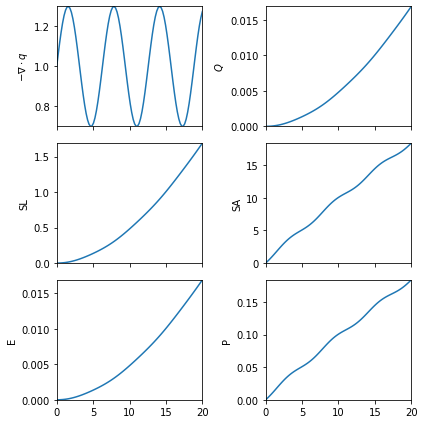

In [17]:
#Valves functions
nqfun=lambda t,L,A:1+0.3*np.sin(t)
Pfun=lambda t,L,A:0.01*A
Efun=lambda t,L,A:0.01*L
Qfun=lambda t,L,A:0.01*L
vfuns=nqfun,Pfun,Efun,Qfun

#Solution
ts,Ls,As,nqs,Qs,Ps,Es=solveLAR([0,0],0,20,100,vfuns,h=0.1)

plotSolution(ts,nqs,Ls,As,Qs,Ps,Es,ini=0,end=0)

In [19]:
nqint,Qint,input,stored,dmass=massConservation(ts,Ls,As,nqs,Qs,Ps,Es)
nqint,Qint,input,stored,dmass

(20.177575322307902,
 0.12023303330945212,
 20.05734228899845,
 20.057342072455118,
 -2.1654333082210542e-07)

In [ ]:
fig=animateLAR(ts,nqs,Ls,As,Qs,Ps,Es,it=-1)
fig

## Experiment 1: no control

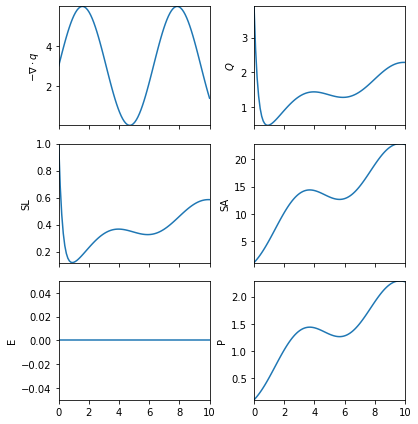

In [38]:
#Valves functions
nqfun=lambda t,L,A:3+3*np.sin(t)
Pfun=lambda t,L,A:0.1*A
Efun=lambda t,L,A:0.0*L
Qfun=lambda t,L,A:3.9*L
vfuns=nqfun,Pfun,Efun,Qfun

#Solution
ts,Ls,As,nqs,Qs,Ps,Es=solveLAR([1,1],0,10,100,vfuns,h=0.01)

plotSolution(ts,nqs,Ls,As,Qs,Ps,Es,ini=0,end=0)

In [41]:
nqint,Qint,input,stored,dmass=massConservation(ts,Ls,As,nqs,Qs,Ps,Es)
nqint,Qint,input,stored,dmass

(35.51721411794179,
 14.177552636250764,
 21.339661481691024,
 21.339726662978975,
 6.518128795107714e-05)

In [ ]:
fig=animateLAR(ts,nqs,Ls,As,Qs,Ps,Es,it=-1)
fig

In [ ]:
"""
fig.save("animation.mp4")
from google.colab import files
files.download('animation.mp4') 
""";

## Experiment 2: conditionals

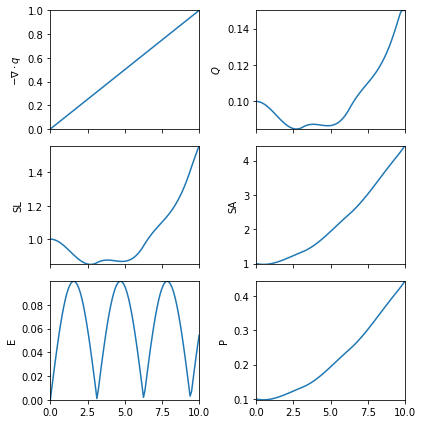

In [ ]:
#Valves functions
nqfun=lambda t,L,A:0.1*t
Pfun=lambda t,L,A:0.1*A
Efun=lambda t,L,A:0.0*L

def Efun(t,L,A):
  E=0.1*np.abs(np.sin(t))
  return E

def Qfun(t,L,A):
  Lmax=1.5
  if L<1.5:
    Q=0.1*L
  else:
    Q=0.1*Lmax
  return Q
Qfun=np.vectorize(Qfun)

vfuns=nqfun,Pfun,Efun,Qfun

#Solution
ts,Ls,As,nqs,Qs,Ps,Es=solveLAR([1,1],0,10,100,vfuns,h=0.1)

plotSolution(ts,nqs,Ls,As,Qs,Ps,Es,ini=0,end=0)

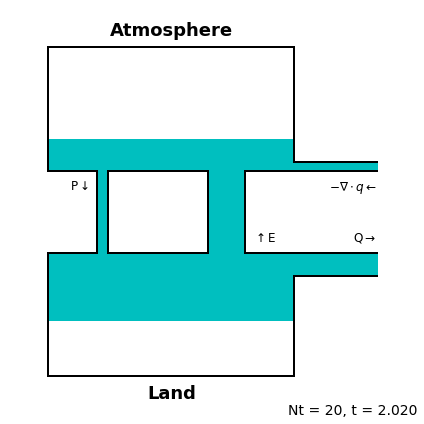

In [ ]:
fig=animateLAR(ts,nqs,Ls,As,Qs,Ps,Es,it=20)
fig